In [2]:
from google.colab import files
import pandas as pd

# Upload the CSV file
uploaded = files.upload()

Saving Corona_NLP_test.csv to Corona_NLP_test.csv


In [16]:
df = pd.read_csv('Corona_NLP_test.csv')

In [17]:
# check for missing values
print(df.isna().sum())

# remove rows with missing values in the OriginalTweet column
df = df.dropna(subset=['OriginalTweet'])

# verify that missing values have been removed
print(df.isna().sum())


UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64
UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64


As we are only working the original tweet column i am not cleaning the data based on location

In [18]:
df.to_csv('Clean_Corona_NLP_test.csv', index=False)

Storing the clean data to Clean_Corona_NLP_test.csv file for re_use of data

a) Convert the text corpus into tokens:

In [19]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

# tokenize tweets
df['tokens'] = df['OriginalTweet'].apply(lambda x: word_tokenize(x.lower()))
print(df['tokens'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0       [trending, :, new, yorkers, encounter, empty, ...
1       [when, i, could, n't, find, hand, sanitizer, a...
2       [find, out, how, you, can, protect, yourself, ...
3       [#, panic, buying, hits, #, newyork, city, as,...
4       [#, toiletpaper, #, dunnypaper, #, coronavirus...
                              ...                        
3793    [meanwhile, in, a, supermarket, in, israel, --...
3794    [did, you, panic, buy, a, lot, of, non-perisha...
3795    [asst, prof, of, economics, @, cconces, was, o...
3796    [gov, need, to, do, somethings, instead, of, b...
3797    [i, and, @, forestandpaper, members, are, comm...
Name: tokens, Length: 3798, dtype: object


b) Perform stop word removal:

In [24]:
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
print(stop_words)
# remove stop words
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
print(df['tokens'])

{'me', "should've", "hasn't", 'very', 'then', 'down', 'while', 'such', "you've", 'a', "doesn't", 'shan', 'hers', "didn't", 'were', 'only', 'now', "haven't", 'or', 'he', "she's", 'has', 're', 'his', 'him', 'under', 'which', 'weren', 'ourselves', "wasn't", "you're", 'does', 'some', "couldn't", 'through', 'do', 'himself', 'to', 'all', 'nor', 'same', 'y', 'any', 'is', 'further', 'm', 'from', 'd', 'more', 'doing', 'ma', 'just', 'at', "wouldn't", "mightn't", 'whom', 'll', 'yours', 'too', 'have', 've', 'you', 'up', 'both', 'needn', 'few', 'itself', 'against', 'each', 'your', 'out', 'had', 'it', 'about', 'who', 'wouldn', 'she', "needn't", 'no', 'we', 'the', 'by', 'isn', 'these', 'hasn', 'other', 'having', "aren't", "you'll", "mustn't", "won't", "don't", 't', 'o', 'so', 'what', 'mightn', 'i', 'wasn', 'aren', 'because', 'in', 'how', 'shouldn', 'below', 'theirs', 'will', 'they', 'its', 'why', 'won', 'be', 'again', "that'll", 'where', "weren't", 'with', 'as', 'there', "you'd", 'being', 'but', 'you

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


from the output we can see that the stop words are removed

c) Count word frequencies

In [25]:
from collections import Counter

# count word frequencies
df['word_counts'] = df['tokens'].apply(lambda x: Counter(x))
print(df['word_counts'])

0       {'trending': 1, ':': 3, 'new': 1, 'yorkers': 1...
1       {'could': 1, 'n't': 1, 'find': 1, 'hand': 1, '...
2       {'find': 1, 'protect': 1, 'loved': 1, 'ones': ...
3       {'#': 11, 'panic': 1, 'buying': 1, 'hits': 1, ...
4       {'#': 11, 'toiletpaper': 1, 'dunnypaper': 1, '...
                              ...                        
3793    {'meanwhile': 1, 'supermarket': 1, 'israel': 1...
3794    {'panic': 1, 'buy': 1, 'lot': 1, 'non-perishab...
3795    {'asst': 1, 'prof': 1, 'economics': 1, '@': 2,...
3796    {'gov': 1, 'need': 1, 'somethings': 1, 'instea...
3797    {'@': 1, 'forestandpaper': 1, 'members': 1, 'c...
Name: word_counts, Length: 3798, dtype: object


In [26]:
# merge all word counts into a single Counter object
all_word_counts = Counter()
for word_count in df['word_counts']:
    all_word_counts.update(word_count)

# display the count of each word
for word, count in all_word_counts.items():
    print(f"{word}: {count}")


Streaming output truncated to the last 5000 lines.
panic-filled: 1
analogy: 2
//t.co/cj1wgroesg: 1
sheer: 1
tonights: 1
carne: 1
grass: 1
veal: 1
downside: 2
coronaproblems: 1
99problems: 1
stockpilingtwats: 1
buy: 1
paper: 1
stock: 1
food: 1
keep: 1
news: 1
newhorizons: 1
animalcrossingnewhorizons: 1
//t.co/djisbrtwzu: 1
nkdarin: 1
minvws: 2
7-10: 2
lesson: 2
minpres: 1
covi: 1
robjetten: 1
ivanengelshoven: 1
culture: 1
coronavirusnl: 1
chillin: 1
laundry: 4
selfquarantine: 2
ploy: 1
quarter: 2
revenues: 1
dodge: 1
kevinbacon: 1
//t.co/akhnnov1ku: 1
staten: 1
paper/paper: 1
ny1desk: 1
ny1newsat11: 1
alysiastern: 1
treydwag2020: 1
ny1pic: 1
//t.co/rkqdmvzw19: 1
toiket: 1
penny: 2
dontbeanasshole: 1
toilet-paper: 1
ocd: 1
agoraphobe: 1
//t.co/wip5y4jpie: 1
drones: 1
//t.co/7obakpegeo: 1
owning: 1
laptop: 1
intl: 1
stabilize: 1
substitutes: 1
collaborate: 1
diaspora: 1
classy: 2
shortest: 1
buhari: 1
//t.co/mua1giqtvx: 1
unconcerned: 1
wholeheartedly: 1
dramatic: 1
informing: 2
ad

d) Create word clouds:

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


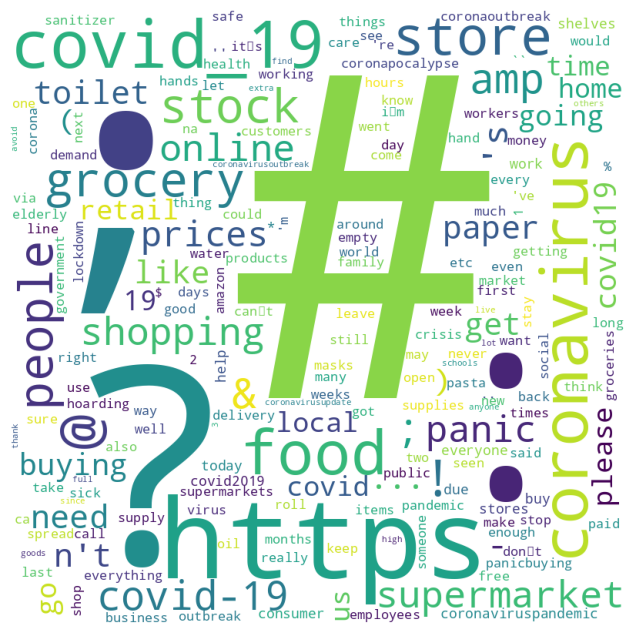

In [27]:
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# create word cloud
all_word_counts = Counter()
for word_count in df['word_counts']:
    all_word_counts.update(word_count)
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(all_word_counts)

# display the generated image
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
